<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Introducing the Scikit-Learn API

For this simple introduction we will be using the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) which was first analyzed by Ronald Fisher in 1936.  It is arguably the most famous dataset used by students learning about machine learning.

<img style="padding-top:10px;" src="iris.jpg">  

In [1]:
# Import the libraries we know we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset using a helper function in Seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.  Each column of the data refers to a particular quantitative piece of information that describes each observed flower, which are called the "features" of the dataset.

Our objective in this project is to use the features to predict which species of iris each particular flower is (setosa, versicolor, or virginica).

In [3]:
# How many observations do we have?
iris.shape[0]

150

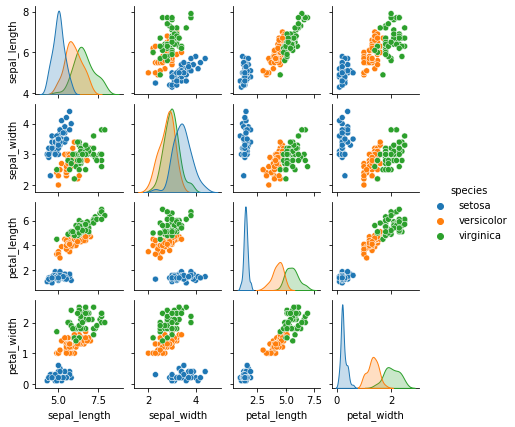

In [4]:
# Let's first visually explore the relationships between the features and the target (species)
sns.pairplot(iris, hue='species', height=1.5);

Now let's create a model to identify the species based on the input features.  Remember, the steps in Scikit-Learn to build a model are the following:  
1) Arrange data into features matrix (X) and target vector (y)  
2) Select a class of algorithm  
3) Choose model hyperparameters  
4) Fit the model to the data  
5) Use the model to predict targets for new data

## Step 1: Arrange data into features matrix (X) and target vector (y)

<img style="padding-top:10px;" src="samples-features.png">  
*Image source: Python Data Science Handbook*

In [7]:
# Create feature matrix
X = iris.drop(labels='species',axis=1)

# Create target vector
y = iris['species']

## Step 2: Select an algorithm

In [8]:
# Let's use a multi-layer perceptron, a form of neural network
from sklearn.neural_network import MLPClassifier

## Step 3: Choose model hyperparameters by instantiating the model class

In [9]:
# Create an instance of the algorithm and set the hyperparameter values
model = MLPClassifier(hidden_layer_sizes=(100,50),activation='relu',
                      solver='sgd',learning_rate_init=0.01,max_iter=500)

## Step 4: Fit the model to your data using the fit() method

In [10]:
# Fit the model to the data
model.fit(X,y)

MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
              max_iter=500, solver='sgd')

## Step 5: Apply your model to new data to generate predictions

In [11]:
# Get predictions for our dataset
preds = model.predict(X)

# Calculate the classification accuracy
acc = sum(preds==y)/len(y)
print('Accuracy of our classifier is {:.3f}'.format(acc))

Accuracy of our classifier is 0.980


Wow! With just 5 lines of code we trained a neural network capable of predicting types of iris flowers with 98% accuracy!!

BUT... there is a couple major flaws in our process.  What did we do wrong?